# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [37]:
print(f"Using API Key: {weather_api_key}")


Using API Key: 0224efa302b87fda4317868e8be448d9


### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(f"Total cities collected: {len(city_data)}")
print(city_data[:5])

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | ataq
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | castillos
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | lejanias
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lethbridge
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | shadrinsk
Processing Record 13 of Set 1 | mugia
Processing Record 14 of Set 1 | dryden
Processing Record 15 of Set 1 | arteche
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | susuman
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | contamana
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | portland

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,4.16,80,0,1.45,RU,1721940433
1,ataq,14.5377,46.8319,29.73,42,98,1.81,YE,1721940433
2,blackmans bay,-43.0167,147.3167,7.51,77,84,0.45,AU,1721940433
3,castillos,-34.1667,-53.8333,11.91,80,0,1.86,UY,1721940433
4,edinburgh of the seven seas,-37.0676,-12.3116,13.72,84,8,17.08,SH,1721940433


In [44]:
import os

# Create the directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,4.16,80,0,1.45,RU,1721940433
1,ataq,14.5377,46.8319,29.73,42,98,1.81,YE,1721940433
2,blackmans bay,-43.0167,147.3167,7.51,77,84,0.45,AU,1721940433
3,castillos,-34.1667,-53.8333,11.91,80,0,1.86,UY,1721940433
4,edinburgh of the seven seas,-37.0676,-12.3116,13.72,84,8,17.08,SH,1721940433


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

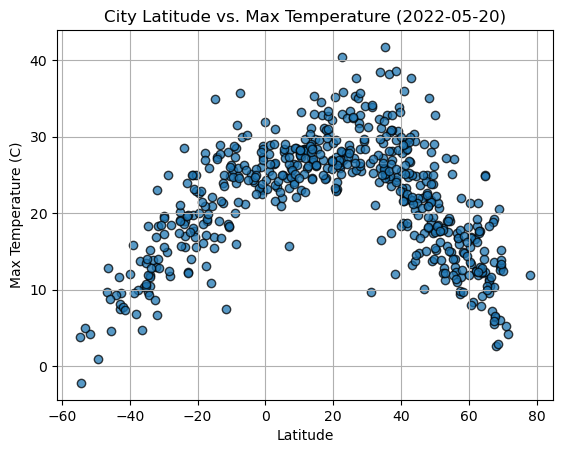

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

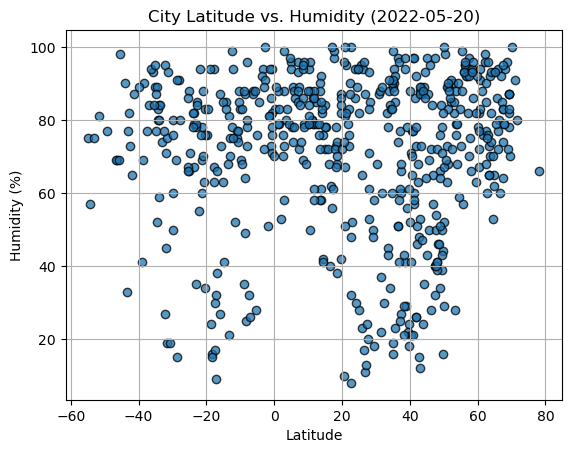

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

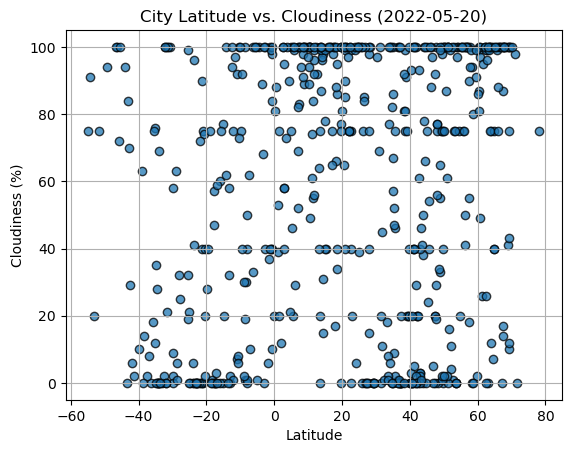

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values, linewidths=1, alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    if not os.path.exists("output_data"):
        os.makedirs("output_data")
    plt.savefig(save_path)
    plt.show()


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,4.16,80,0,1.45,RU,1721940433
1,ataq,14.5377,46.8319,29.73,42,98,1.81,YE,1721940433
5,naze,28.3667,129.4833,25.51,85,100,9.09,JP,1721940433
6,lejanias,3.5251,-74.0216,23.41,80,73,1.15,CO,1721940433
7,hawaiian paradise park,19.5933,-154.9731,26.73,87,100,1.54,US,1721940363


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,7.51,77,84,0.45,AU,1721940433
3,castillos,-34.1667,-53.8333,11.91,80,0,1.86,UY,1721940433
4,edinburgh of the seven seas,-37.0676,-12.3116,13.72,84,8,17.08,SH,1721940433
8,ushuaia,-54.8000,-68.3000,3.81,75,75,10.80,AR,1721940433
10,port-aux-francais,-49.3500,70.2167,0.92,77,94,11.12,TF,1721940434


###  Temperature vs. Latitude Linear Regression Plot

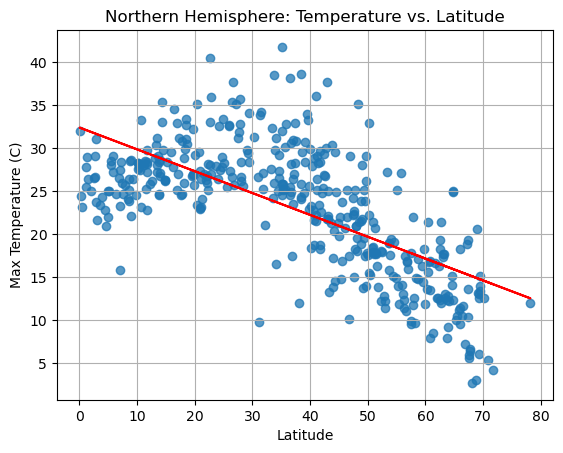

In [112]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Northern Hemisphere: Temperature vs. Latitude",
    "Max Temperature (C)",
    (0, -10),
    "output_data/Northern_Temperature_vs_Latitude.png"
)

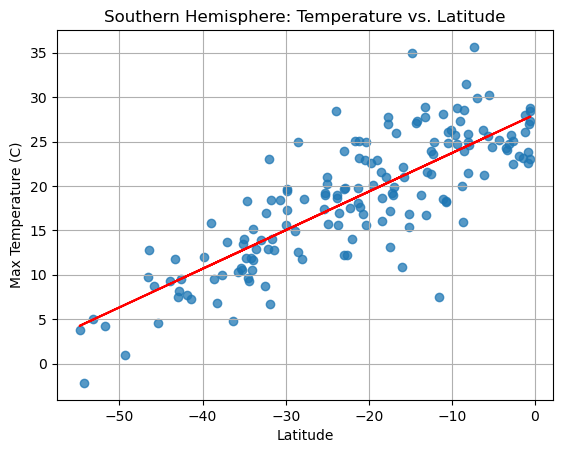

In [119]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Southern Hemisphere: Temperature vs. Latitude",
    "Max Temperature (C)",
    (0, -10),
    "output_data/Southern_Temperature_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

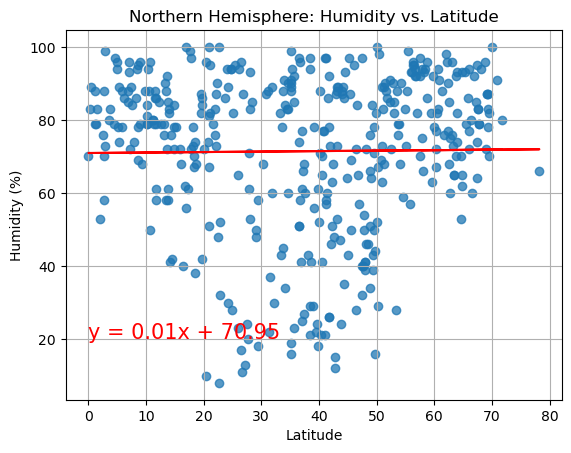

In [113]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Northern Hemisphere: Humidity vs. Latitude",
    "Humidity (%)",
    (0, 20),
    "output_data/Northern_Humidity_vs_Latitude.png"
)

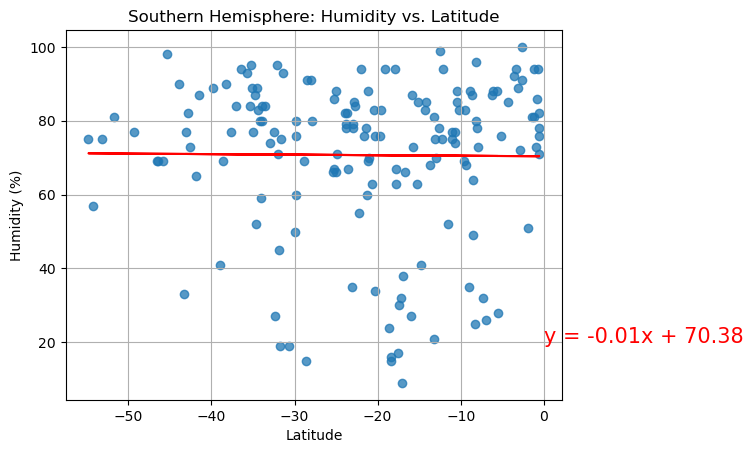

In [118]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Southern Hemisphere: Humidity vs. Latitude",
    "Humidity (%)",
    (0, 20),
    "output_data/Southern_Humidity_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

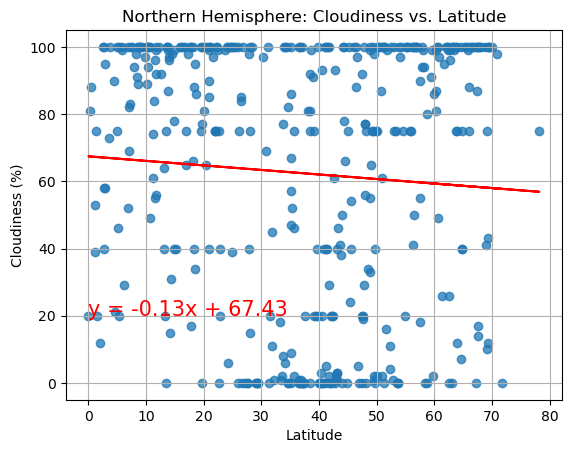

In [114]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "Cloudiness (%)",
    (0, 20),
    "output_data/Northern_Cloudiness_vs_Latitude.png"
)

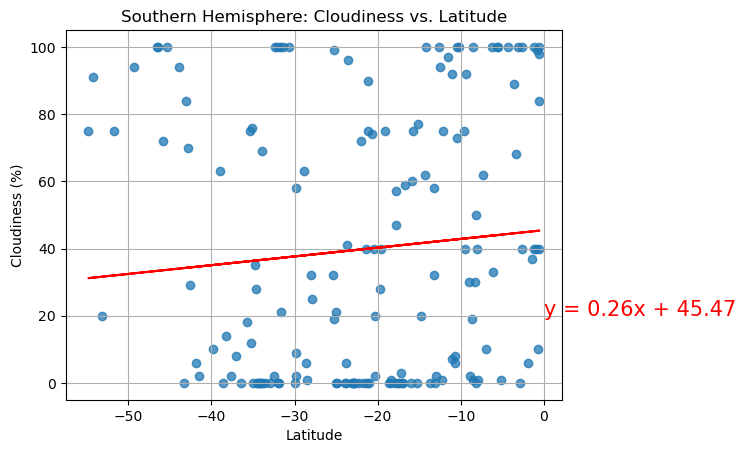

In [117]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "Cloudiness (%)",
    (0, 20),
    "output_data/Southern_Cloudiness_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

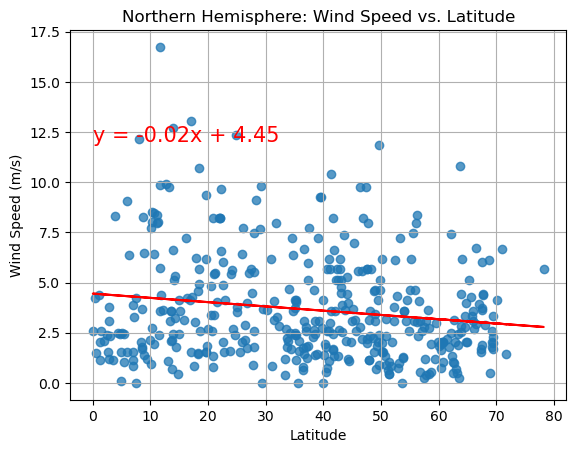

In [115]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "Wind Speed (m/s)",
    (0, 12),
    "output_data/Northern_WindSpeed_vs_Latitude.png"
)

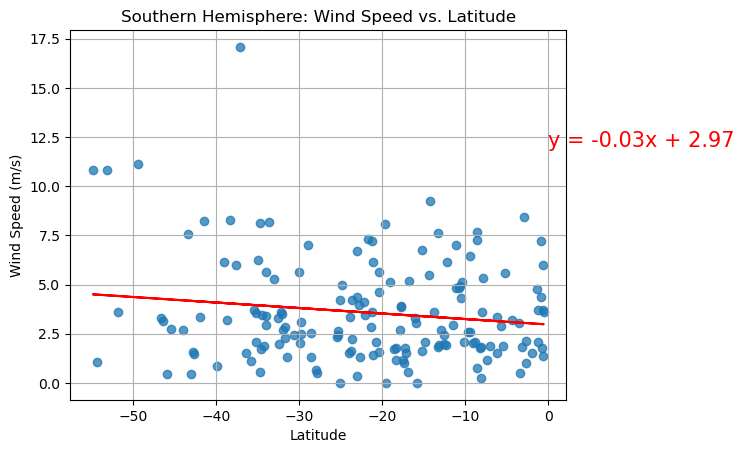

In [116]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "Wind Speed (m/s)",
    (0, 12),
    "output_data/Southern_WindSpeed_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
It made complete sense that temperature increases as latitude decreases in both the Northern and Southern Continent. This indicates that as you get closer to the equator, temperatures will rise. I was suprised, though, that there was no significant change in any of the other weather categories. While there was a slight shift in cloudiness levels as you get closer to the equator, it was not as significant as I expected. Perhaps humitidy is something that shifts more along lines of longitude. But then again, aren't cloudiness and humiditiy levels correlated? Aren't nearly all weather characteristics affected by one another?